In [20]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
wage = pd.read_csv("wage.csv", index_col=False)
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


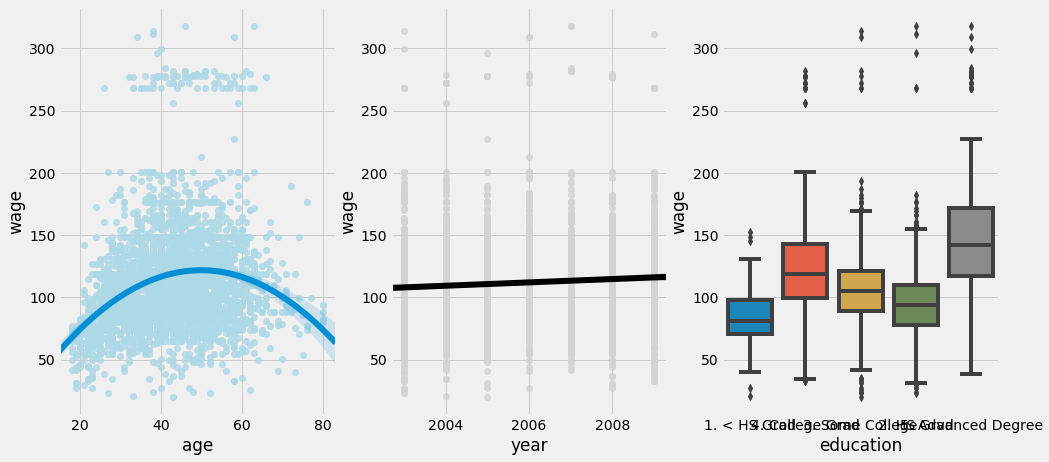

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))


sns.regplot(x="age", y="wage", data=wage, order=2, ci=99, scatter_kws={"color": "lightblue"}, ax=ax1)
sns.regplot(x="year", y="wage", data=wage, scatter_kws={"color": "lightgray"}, line_kws={"color": "black"}, ax=ax2)
sns.boxplot(x="education", y="wage", data=wage, ax=ax3)

In [188]:
smarket = pd.read_csv("smarket.csv")
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


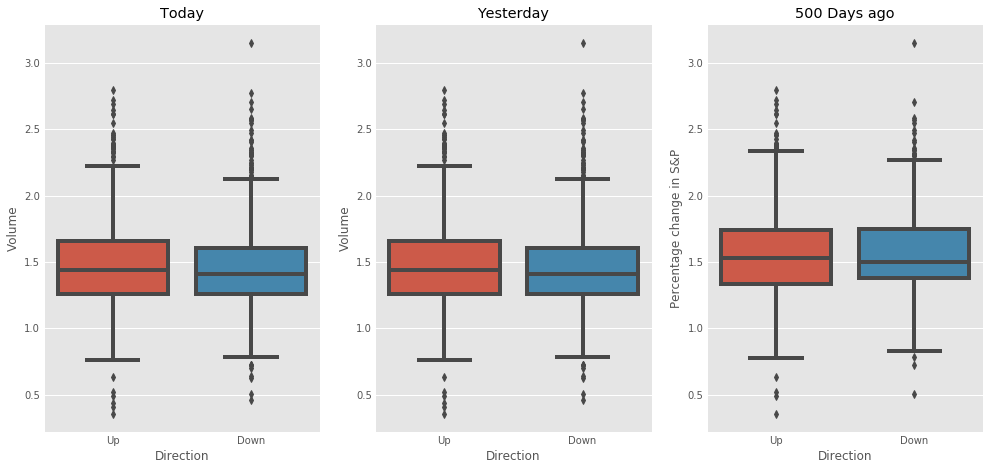

In [143]:
plt.style.use('ggplot')
fig, axes  = plt.subplots(1,3, figsize=(15,7))

sns.boxplot(x="Direction", y="Volume", data=smarket[:], ax = axes[0])
sns.boxplot(x="Direction", y="Volume", data=smarket[1:], ax = axes[1])
sns.boxplot(x="Direction", y="Volume", data=smarket[500:], ax = axes[2])

plt.ylabel("Percentage change in S&P")

axes[0].title.set_text('Today')
axes[1].title.set_text('Yesterday')
axes[2].title.set_text('500 Days ago')

In [215]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
X = (smarket
     .loc[:,"Year":"Lag5"]
     .query('Year < 2005')
     .drop('Year', axis = 1)
    ) 

Y = (smarket
     .query('Year < 2005')
     .filter(["Direction"])
    )

test_x = (smarket
          .loc[:,"Year":"Lag5"]
          .query('Year == 2005')
          .drop('Year', axis = 1)
         )

print("Shape of X : {0}, Y {1}, X_test {2}".format(X.shape, Y.shape, test_x.shape))

Shape of X : (998, 5), Y (998, 1), X_test (252, 5)


In [211]:
clf.fit(X,Y.values.ravel())

predictions = clf.predict_proba(test_x)
results = pd.DataFrame(predictions, columns = ["Down","Up"])
results = pd.melt(results)

Text(0.5, 0, 'Direction')

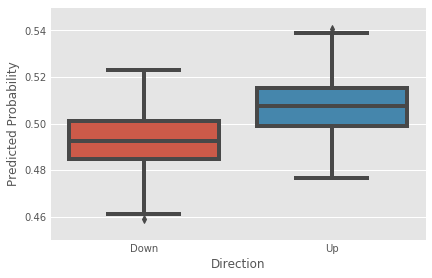

In [213]:
sns.boxplot(x="variable", y="value", data=results)
plt.ylim([0.45,0.55])
plt.ylabel("Predicted Probability")
plt.xlabel("Direction")

In [261]:
ads = pd.read_csv("Advertising.csv")
ads.drop(["Unnamed: 0"], axis=1 , inplace=True)
ads.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


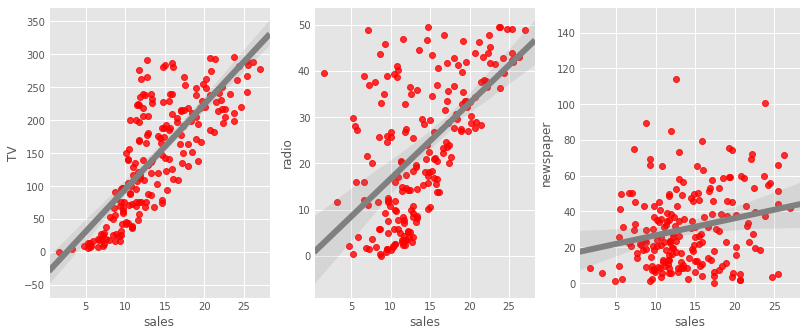

In [290]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,5))

sns.regplot(x="sales", y="TV", data=ads, order=1, ci=99, ax=ax1, scatter_kws = {"color":"red"}, line_kws = {"color":"gray"})
sns.regplot(x="sales", y="radio", data=ads, order=1, ci=99, ax=ax2, scatter_kws = {"color":"red"}, line_kws = {"color":"gray"})
sns.regplot(x="sales", y="newspaper", data=ads, order=1, ci=99, ax=ax3, scatter_kws = {"color":"red"}, line_kws = {"color":"gray"})


In [301]:
import statsmodels.api as sm

X = (ads
    .drop(["sales"], axis=1)
    )
Y = (ads
    .filter(["sales"])
    )

model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          2.43e-171
Time:                        15:57:54   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
income = pd.read_csv("Income1.csv")
income = income.loc[:,"Education":"Income"]
income.head(4)

,Education,Income
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841


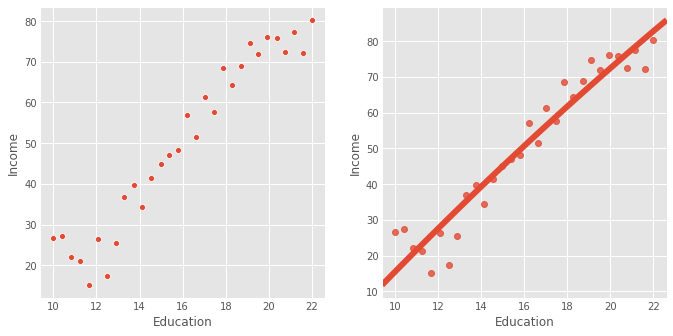

In [319]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="Education", y="Income", data=income, ax=ax1)
sns.regplot(x="Education", y="Income", data=income, order=2, ax=ax2, ci=None)

In [320]:
income2 = pd.read_csv("Income2.csv")
income2.head()
income2.drop(["Unnamed: 0"], axis=1 , inplace=True)
income2.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173
